# Esercitazione 1

## Esercizio 1.0

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

Per svolgere il calcolo dell'integrale si è utilizzato il metodo della media integrale, per cui:

$$ \langle f(x) \rangle = \int_a^b f(x)\rho(x) dx$$

Dove nel nostro caso si è scelto di usare la distribuzione uniforme $\rho(x)=\frac{1}{b-a}$ 

Per la stima dell'integrale e del suo errore si è poi utilizzato il Teorema del Limite Centrale tramite l'uso della media a blocchi, nel dettaglio:

1. Sono stati estratti uniformemente $M=10^4$ numeri in (0,1), sono stati divisi $N=100$ blocchi di lunghezza L
2. Per ogni blocco sono stati stimati $\langle I_{N}\rangle $ e $\langle I_{N}^2\rangle $ 
3. Si e' poi svolta la media progressiva in funzione degli N blocchi e si e' stimata l'incertezza come:

    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N I^2_i - \left( \frac{1}{N} \sum_{i=1}^N I_i \right)^2 \right]} $$


 
 



2. Si ripete il procedimento per il calcolo della varianza: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">

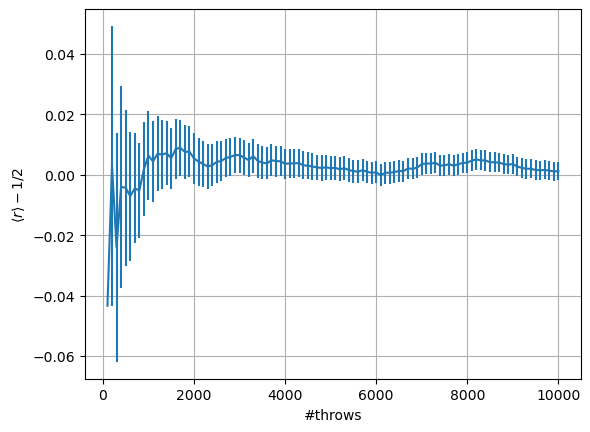

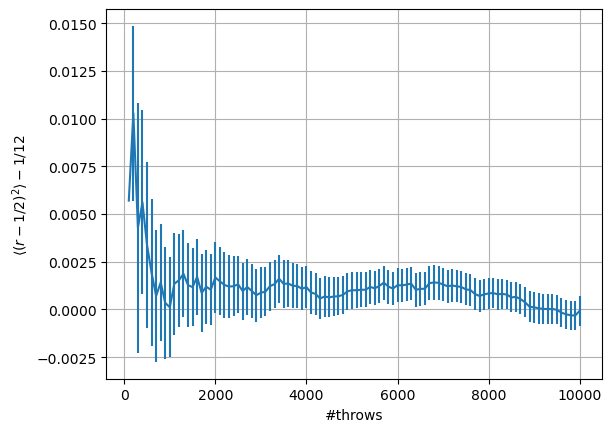

In [1]:


import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math



A=np.loadtxt("mean.data")




plt.errorbar(A[:,0],A[:,1]-1/2,yerr=A[:,2])
plt.xlabel('#throws')
plt.ylabel(r'$\langle r \rangle-1/2$')
plt.grid(True)
plt.show()

Var=np.loadtxt("var.data")


plt.errorbar(Var[:,0],Var[:,1]-1/12,yerr=Var[:,2])
plt.xlabel('#throws')
plt.ylabel(r'$\langle (r-1/2)^2 \rangle-1/12$')
plt.grid(True)
plt.show()



3. Per essere sicuri che il generatore di numeri casuali estragga effetivamente dei numeri distributi uniformemente si e' effettuato un test di Chi quadro dividendo l'intervallo (0,1) in M=100 sotto-intervalli

    E' di seguito riportato la distribuzione di $\chi^2$ per M=100 gradi di liberta ottenuta effetuando il test 100 volte
    



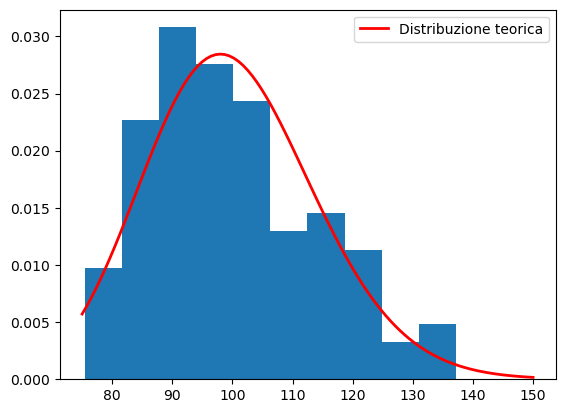

In [2]:
# plot del test di chi quadrato per 100-1 gradi di liberta'

chi=np.loadtxt("chi.data")


plt.hist(chi, bins=10, density=True)


from scipy.stats import chi2

df=100 #gradi di liberta della distribuzione chi quadrato

x = np.linspace(75, 150, 99)  # Intervallo di valori
y = chi2.pdf(x, df)  # Calcola la distribuzione teorica di chi quadrato

plt.plot(x, y, 'r-', lw=2, label='Distribuzione teorica')  # Disegna la distribuzione teorica
plt.legend()
plt.show()



## Exercise 01.2
Sono stati successivamente implementati al generatore di numeri casuali, grazie al metodo della funzione cumulativa inversa, i metodi per l'estrazione delle seguenti pdf :

1. Distribuzione esponenziale: $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$
2.  Distrubuzione di Cauchy-Lorentz: $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$

Si e' poi verificato il teorema del limite  centrale per le seguenti distribuzioni andando a plottare $10^4$ volte il valore medio ottenuto estraendo N={1,2,10,100} volte i valori 

###  Dado Uniforme (Caso Discreto)

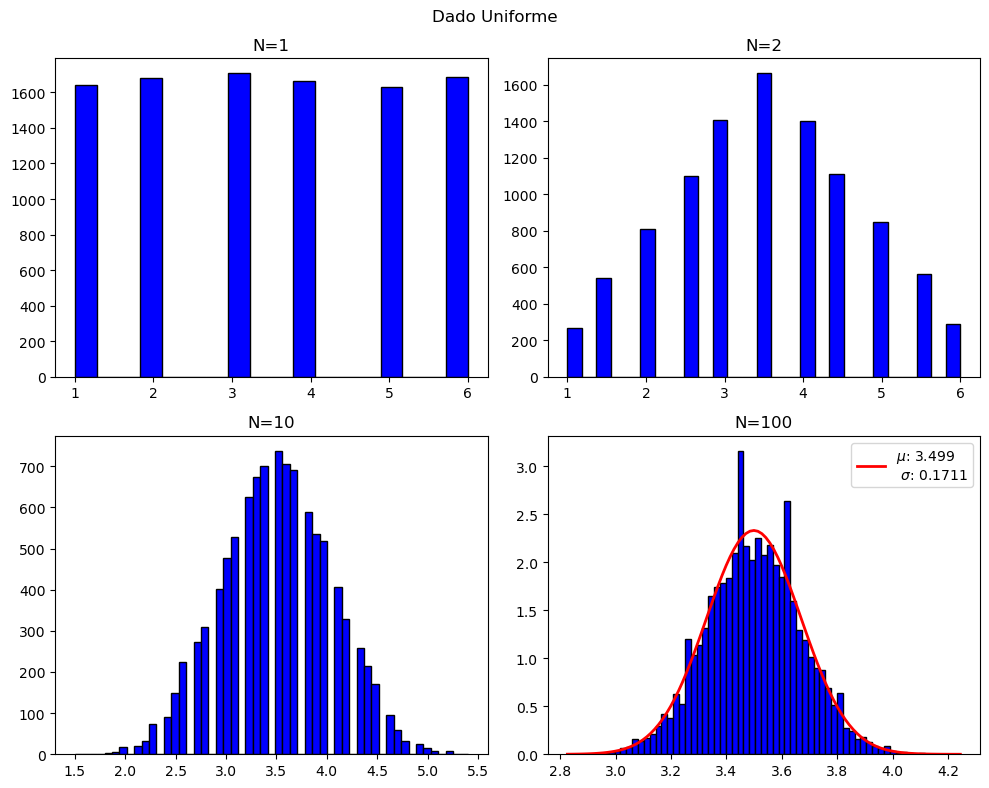

3.498709 0.1711209610743231


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

dice1 = np.loadtxt("dice1.data")
dice2 = np.loadtxt("dice2.data")
dice10 = np.loadtxt("dice10.data")
dice100 = np.loadtxt("dice100.data")

# Creazione della figura e degli assi
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Dado Uniforme')

# Istogramma 1
axs[0, 0].hist(dice1, bins="fd", color='blue', edgecolor='black')
axs[0, 0].set_title('N=1')

# Istogramma 2
axs[0, 1].hist(dice2, bins="fd", color='blue', edgecolor='black')
axs[0, 1].set_title('N=2')

# Istogramma 3
axs[1, 0].hist(dice10, bins="fd", color='blue', edgecolor='black')
axs[1, 0].set_title('N=10')

# Istogramma 4 con fit distribuzione normale
axs[1, 1].hist(dice100, bins="fd", color='blue', edgecolor='black', density=True)
axs[1, 1].set_title('N=100')


mu, std = norm.fit(dice100)
xmin, xmax = axs[1, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[1, 1].plot(x, p, linewidth=2,color='red',label="$\mu$: {:.4} \n $\sigma$: {:.4}".format(mu,std))

plt.tight_layout()
plt.legend()
plt.show()

print(mu,std)


### Distribuzione esponenziale

Con $\lambda=1$, valore medio atteso $\mu=1$ e $\sigma=0,1$

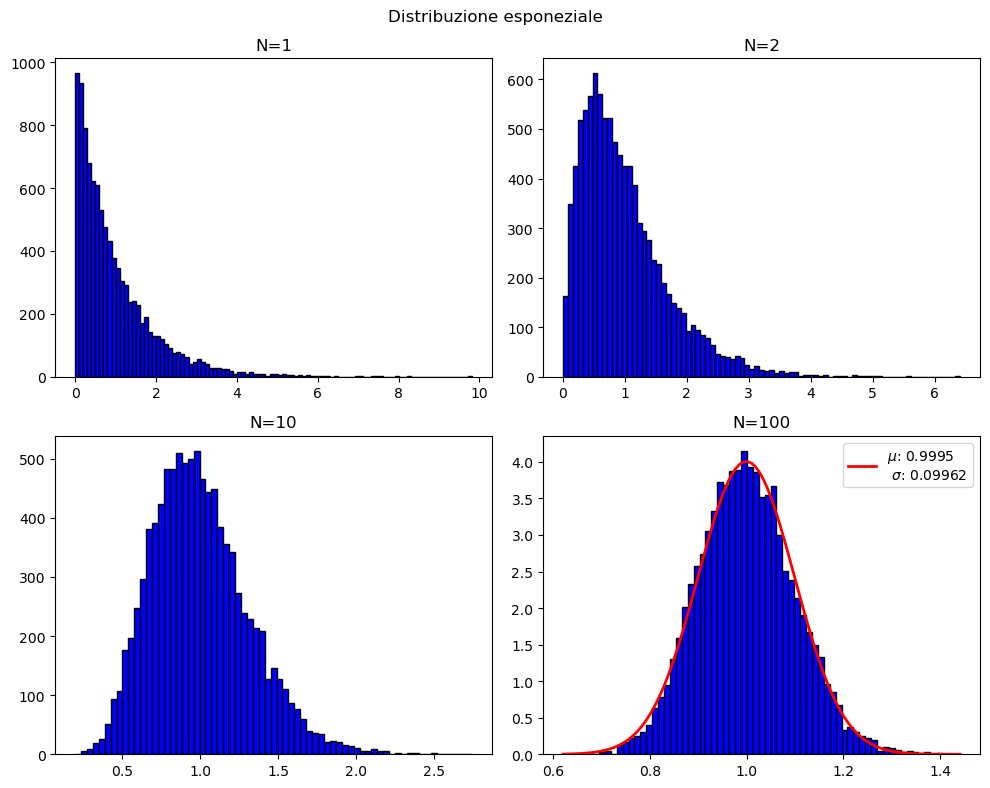

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

exp1 = np.loadtxt("exp1.data")
exp2 = np.loadtxt("exp2.data")
exp10 = np.loadtxt("exp10.data")
exp100 = np.loadtxt("exp100.data")

# Creazione della figura e degli assi
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribuzione esponeziale')

# Istogramma 1
axs[0, 0].hist(exp1, bins="fd", color='blue', edgecolor='black')
axs[0, 0].set_title('N=1')

# Istogramma 2
axs[0, 1].hist(exp2, bins="fd", color='blue', edgecolor='black')
axs[0, 1].set_title('N=2')

# Istogramma 3
axs[1, 0].hist(exp10, bins="fd", color='blue', edgecolor='black')
axs[1, 0].set_title('N=10')

# Istogramma 4 con fit distribuzione normale
axs[1, 1].hist(exp100, bins="fd", color='blue', edgecolor='black', density=True)
axs[1, 1].set_title('N=100')


mu, std = norm.fit(exp100)
xmin, xmax = axs[1, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[1, 1].plot(x, p, linewidth=2,color='red',label="$\mu$: {:.4} \n $\sigma$: {:.4}".format(mu,std))

plt.tight_layout()
plt.legend()
plt.show()


### Distribuzione di Cauchy

Nel caso della distribuzione di Cauchy, il teorema del limite centrale fallisce, questo a causa della varianza infinita della distribuzione.

Tuttavia, il teorema puo' essere generalizzato, ammettendo una classe di distribuzioni le quali convergono verso degli attrattori diversi dalla distribuzione normale.

Nel caso della lorentziana, essa convergera' a se' stessa.

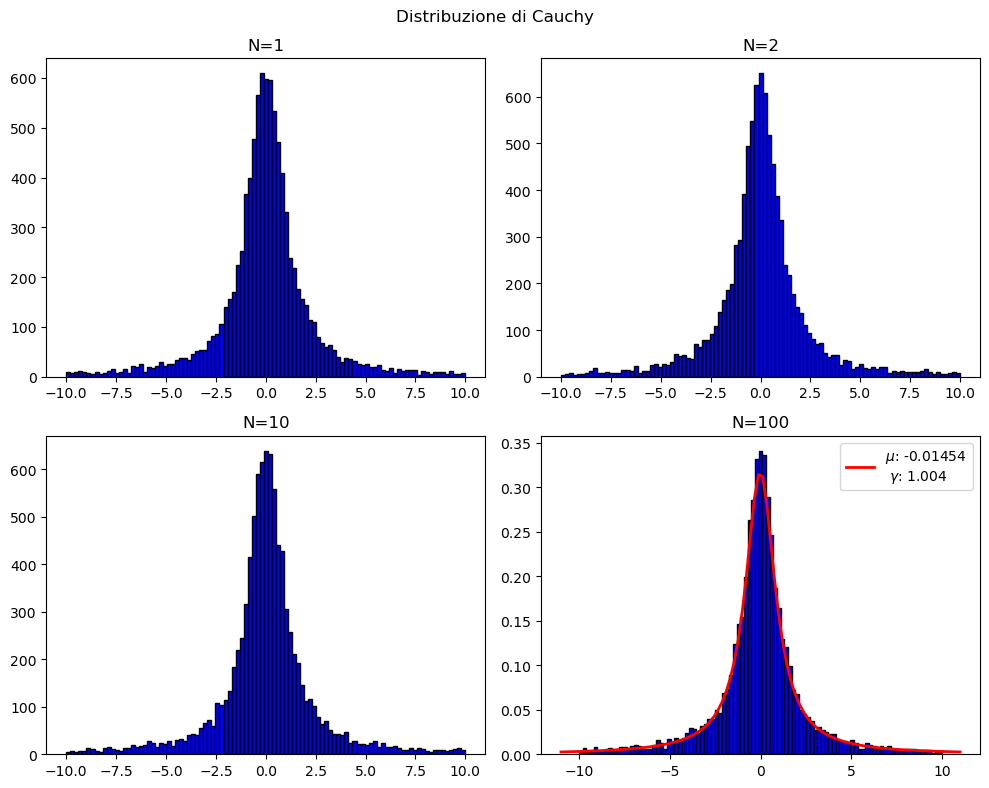

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import cauchy

cauchy1 = np.loadtxt("cauchy1.data")
cauchy2 = np.loadtxt("cauchy2.data")
cauchy10 = np.loadtxt("cauchy10.data")
cauchy100 = np.loadtxt("cauchy100.data")

# Creazione della figura e degli assi
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribuzione di Cauchy')
bins=np.linspace(-10,10,num=100)
# Istogramma 1
axs[0, 0].hist(cauchy1, bins, color='blue', edgecolor='black')
axs[0, 0].set_title('N=1')

# Istogramma 2
axs[0, 1].hist(cauchy2, bins, color='blue', edgecolor='black')
axs[0, 1].set_title('N=2')

# Istogramma 3
axs[1, 0].hist(cauchy10, bins, color='blue', edgecolor='black')
axs[1, 0].set_title('N=10')

# Istogramma 4 con fit distribuzione di Cauchy
axs[1, 1].hist(cauchy100, bins, color='blue', edgecolor='black', density=True)
axs[1, 1].set_title('N=100')
'''
'''
# Fit distribuzione di Cauchy
xmin, xmax = axs[1, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
params=cauchy.fit(cauchy100)
p = cauchy.pdf(x,*params)
axs[1, 1].plot(x, p, linewidth=2,color='red',label="$\mu$: {:.4} \n $\gamma$: {:.4}".format(params[0],params[1]))

plt.tight_layout()
plt.legend()
plt.show()




## Esercizio 1.03 Calcolo di pi greco

E' stata effettuata una stima di $\pi$ tramite il metodo statistico di Buffon: consiste nel lanciare un ago di lunghezza L in una griglia con delle linee orrizontali distanti d (con d>L).

Detta P la probabilita' che l'ago intersechi una delle righe allora risulta:

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
 

  ### Lancio
   Per simulare il lancio di un ago di lunghezza L=0.7 in una griglia unitaria si estraggono due valori:
   
   1. Il primo vertice dell'ago, distribuito uniformemente tra 0 e 1
   2. L'angolo di inclinazione dell'ago distribuito uniformemente tra 0 e $\pi$
   
   In questo modo e possibile calcolare la posizione del secondo vertice e determinare se l'ago ha intersecato o meno la griglia
   
### Estrazione uniforme dell'angolo
   
   Per estrarre uniformemte l'angolo senza usare a priori il valore di $\pi$ e' stato implementato il seguente metodo di A/R:
   
   Si estraggono dei punti contenuti in una semicircoferenza inscirtta in un rettangolo di dimensioni $[-1,1]\times[0,1]$
   
### Misura 
Sono stati effettutati $M=10^6$ lanci divisi in $N=100$ blocchi, ovvero singole misure della probabilita' P e di $\pi$.

E' di seguito riportato cio che si ottenuto mediando in funzione del numero di blocchi N

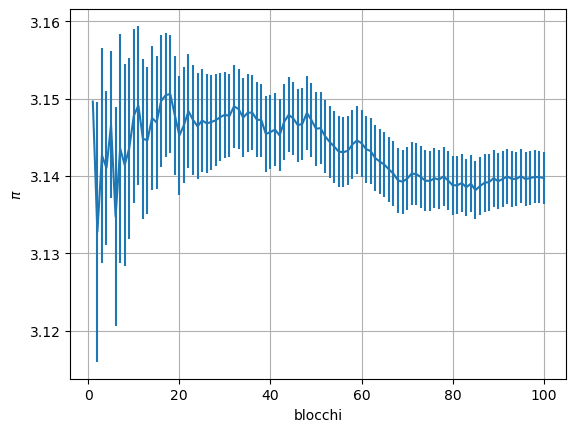

In [4]:
#Esercizio 01.1 Gabriele Puglisi

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math



A=np.loadtxt("buffon.data")




plt.errorbar(A[:,0],A[:,1],yerr=A[:,2])
plt.xlabel('blocchi')
plt.ylabel(r'$\pi$')
plt.grid(True)
plt.show()